# Analyse du questionnaire sur les Journée du Patrimoine

Tout d'abord nous allons lire les données:

In [1]:
d = read.table(file="results-survey4914.tsv", header=TRUE, sep="\t", quote="\"")

Nous pouvons rapidement visualiser un résumé des données pour voir si l'import des données s'est bien passé.

In [2]:
summary(d)

   id_reponse     langue   participation_journees source_journal source_radio
 Min.   :  1.00   de: 24   N:124                  N:317          N:336       
 1st Qu.: 87.75   fr:324   Y:224                  Y: 31          Y: 12       
 Median :174.50                                                              
 Mean   :174.50                                                              
 3rd Qu.:261.25                                                              
 Max.   :348.00                                                              
                                                                             
 source_internet source_amis visite_samedi visite_dimanche      accueil   
 N:208           N:260       N:189         N:196                    :126  
 Y:140           Y: 88       Y:159         Y:152           bien     : 80  
                                                           excellent:137  
                                                           mauvais  :  2  
 

## Moyens de transport

Nous pouvons par exemple travailler un peu sur la colonne des moyens de transports. Chaque ligne contient le moyen de transport utilisé par la personne (un seul moyen par personne).

La première chose que nous pouvons faire est afficher les fréquences:

In [3]:
table(d$moyen_transport)


       a_pied   auto  autre   moto     tp   velo 
   124     17     81      1      3    119      3 

Nous pouvons voir que nous avons des lignes vides. Nous pouvons les remplacer par des valeurs manquantes (`NA` dans le jargon de R):

In [4]:
d$moyen_transport[d$moyen_transport==""] = NA

Du coup, la table des fréquences se présente un peu mieux:

In [5]:
freq_moyen_transport = table(d$moyen_transport)
freq_moyen_transport


       a_pied   auto  autre   moto     tp   velo 
     0     17     81      1      3    119      3 

Pour avoir les fréquences en pourcentages:

In [6]:
prop.table(freq_moyen_transport)


                 a_pied        auto       autre        moto          tp 
0.000000000 0.075892857 0.361607143 0.004464286 0.013392857 0.531250000 
       velo 
0.013392857 

Donc 53% des personnes se sont rendu sur place avec les transports publics, contre seulement 36% en voiture. Bravo!

Peut-être un petit graphique serait assez bien. Pour cela, nous transformons le résultat en tableau (data frame):

In [7]:
freq_table_moytransp = as.data.frame(freq_moyen_transport)
freq_table_moytransp

Var1,Freq
,0
a_pied,17
auto,81
autre,1
moto,3
tp,119
velo,3


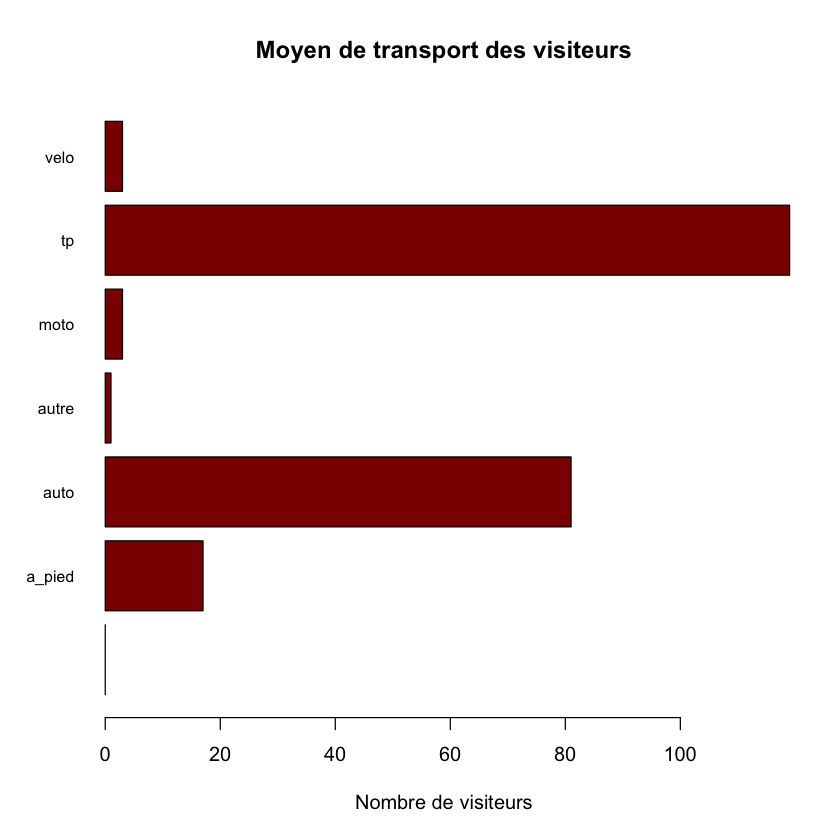

In [8]:
barplot(
    freq_table_moytransp$Freq, 
    main="Moyen de transport des visiteurs", 
    xlab="Nombre de visiteurs", 
    horiz=TRUE, 
    names.arg=freq_table_moytransp$Var1,
    col="darkred",
    las=1, cex.names=.8
)

## Moyens de transport versus la qualité d'accueil

Nous comparons maintenant le moyen de transport utilisé et le jugement des participants quant à la qualité d'accueil sur place.

Regardons les fréquences de la qualité d'accueil d'abord:

In [9]:
table(d$accueil)


               bien excellent   mauvais     moyen 
      126        80       137         2         3 

In [10]:
table(d$moyen_transport)


       a_pied   auto  autre   moto     tp   velo 
     0     17     81      1      3    119      3 

Pour éviter des problèmes avec des effectifs trop faibles, nous allons regrouper les classes en "excellent", "bien", "moins bien" pour l'accueil.

Pour les moyens de transport, nous faisons les classes «tp», «voiture» et «autres».

In [11]:
d$accueil_simple = NA
d$accueil_simple[d$accueil=="moyen"] = "pas_bien"
d$accueil_simple[d$accueil=="mauvais"] = "pas_bien"
d$accueil_simple[d$accueil=="bien"] = "bien"
d$accueil_simple[d$accueil=="excellent"] = "excellent"
table(d$accueil_simple)


     bien excellent  pas_bien 
       80       137         5 

In [12]:
d$transp = NA
d$transp[d$moyen_transport=='auto'] = "auto"
d$transp[d$moyen_transport=='tp'] = "tp"
d$transp[d$moyen_transport=='autre'] = "autre"
d$transp[d$moyen_transport=='moto'] = "autre"
d$transp[d$moyen_transport=='velo'] = "autre"
d$transp[d$moyen_transport=='a_pied'] = "autre"
table(d$transp)


 auto autre    tp 
   81    24   119 

In [13]:
ctbl = table(d$transp, d$accueil_simple)
ctbl

       
        bien excellent pas_bien
  auto    28        50        2
  autre    5        18        1
  tp      47        69        2

Nous pouvons maintenant faire un test du Chi2 pour voir si l'utilisation du moyen de transport est indépendant du jugement de l'accueil. Rappelons que:

$H_0$: les deux variables X et Y sont indépendantes
$H_1$: les deux variables X et Y ne sont pas indépendantes

$H_0$ peut être rejeté si la valeur p est en dessous de 0.01, ou éventuellement, avec plus de précautions, 0.05.

Calculons le test du Chi2:

In [14]:
chisq.test(ctbl)

Warning message in chisq.test(ctbl):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  ctbl
X-squared = 3.5048, df = 4, p-value = 0.4771


Une alerte est donnée en raison de quelques valeurs assez faibles, notamment dans la catégorie «pas_bien» de la variable «accueil».

La p-value est bien supérieure au seuil de rejet de $H_0$. Nous devons donc conclure que le test du Chi2 nous pointe dans la direction de considérer les deux variables «moyen de transport» et «qualité d'accueil» comme étant indépendante, ou autrement dit, qu'il n'y aurait pas de lien statistique entre les deux variables.